### Dependencias

In [2]:
import numpy as np
import pandas as pd 

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import matplotlib.pyplot as plt
import seaborn as sns 
import cufflinks as cf

cf.go_offline()


### Datos Sintéticos

In [3]:
# inputs = media, desviación estándar y tamaño de la muestra.
x1 = np.random.normal(0,1,1000)
x2 = np.random.normal(6,10,1000)
x3 = np.random.normal(-3,100,1000)

In [4]:
y = 2*x1 + 3*x2 + 4*x3 + 5 + np.random.normal(0,1,1000)

In [6]:
df = pd.DataFrame ({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})
df.head()

,x1,x2,x3,y
0,0.731755,15.605941,-183.427132,-679.838726
1,-0.696400,1.129652,105.100110,427.976018
2,-0.004967,17.191880,42.154637,225.184192
3,0.019723,18.054653,-87.953734,-293.114558
4,-0.794356,6.978006,102.437962,432.803355


### Partición de Datos

In [9]:
train, valid = train_test_split (df, test_size = 0.3)
train.reset_index (drop = True, inplace = True)
valid.reset_index(drop = True, inplace = True)
train.shape, valid.shape

((700, 4), (300, 4))

### Aprendizaje 

#### Regresion Lineal 

* Con fit_intercept = False, el modelo no tiene término independiente, y con fit_intercept = True, el modelo tiene término independiente. 

In [10]:
# Creamos un objeto de la clase LinearRegression
rl = LinearRegression()

# Definimos los hiperparámetros
hp = {'fit_intercept':[True,False]}

# Creamos un objeto de la clase GridSearchCV (busqueda de hiperparámetros)
gs = GridSearchCV(rl, # Modelo
                  hp, # Hiperparámetros
                  cv=5, # Número de folds para la validación cruzada
                  scoring='neg_mean_squared_error', # Métrica de evaluación
                  n_jobs=-1, # Número de procesadores a utilizar
                  verbose=True) # Para ver el progreso

# Entrenamos el modelo
gs.fit(train[['x1','x2','x3']],train['y'])

# Obtenemos los mejores hiperparámetros y el mejor score
gs.best_params_,gs.best_score_

# Elegimos el mejor estimador
rl = gs.best_estimator_

# Entrenamos el modelo con el mejor estimador
rl.fit(train[['x1','x2','x3']],train['y'])

# Evaluamos el modelo con los datos de entrenamiento
{'train':mean_absolute_percentage_error(train['y'],rl.predict(train[['x1','x2','x3']])),
 # Evaluamos el modelo con los datos de validación
 'valid':mean_absolute_percentage_error(valid['y'],rl.predict(valid[['x1','x2','x3']]))}

Fitting 5 folds for each of 2 candidates, totalling 10 fits


{'train': 0.021762241769175735, 'valid': 0.012530845596981957}

In [11]:
# Vemos nuestos coeficientes (acompañan a las x's) y el intercepto
rl.coef_, rl.intercept_ 

(array([1.9966293 , 2.99617517, 3.99949359]), 5.03096897404836)

* Con la función sns.kdeplot, se puede graficar la densidad de probabilidad de una variable aleatoria.

<Axes: xlabel='y', ylabel='Density'>

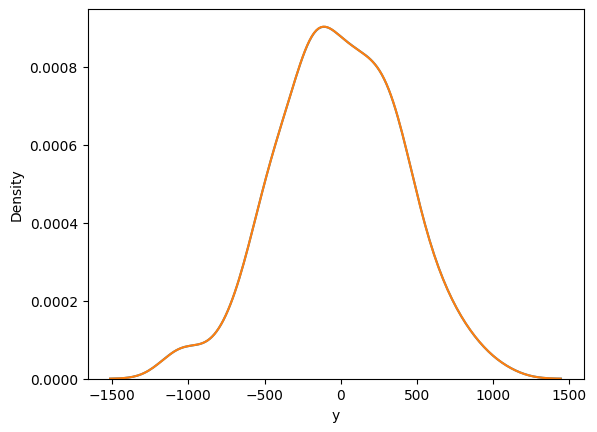

In [15]:
# Densidad de probabiidad de Y de validación
sns.kdeplot(valid['y'])

# Densidad de probabiidad de las predicciones (buscamos predecrir y) con las X's de validación
sns.kdeplot(rl.predict(valid[['x1', 'x2', 'x3']]))

### Regresión Ridge

** Hacemos exactamente lo mismo que con la regresión lineal, pero ahora con la regresión Ridge.**

Con el objeto Ridge, se requiere especificar el parámetro alpha, que es el parámetro de regularización.

In [16]:
# Creamos un objeto de la clase Ridge
rr = Ridge()

# En este caso también ndicamos el parámetro de regularización.
hp = {'alpha':np.logspace(-3,3,100),'fit_intercept':[True,False]}
gs = GridSearchCV(rr,hp,cv=5,scoring='neg_mean_squared_error',n_jobs=-1,verbose=True)
gs.fit(train[['x1','x2','x3']],train['y'])
gs.best_params_,gs.best_score_
rr = gs.best_estimator_
rr.fit(train[['x1','x2','x3']],train['y'])
{'train':mean_absolute_percentage_error(train['y'],rr.predict(train[['x1','x2','x3']])),
 'valid':mean_absolute_percentage_error(valid['y'],rr.predict(valid[['x1','x2','x3']]))}

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


{'train': 0.021724620663515326, 'valid': 0.0125411055885279}

In [17]:
rr.coef_, rr.intercept_

(array([1.98907711, 2.99600742, 3.99949343]), 5.032112034584539)

<Axes: xlabel='y', ylabel='Density'>

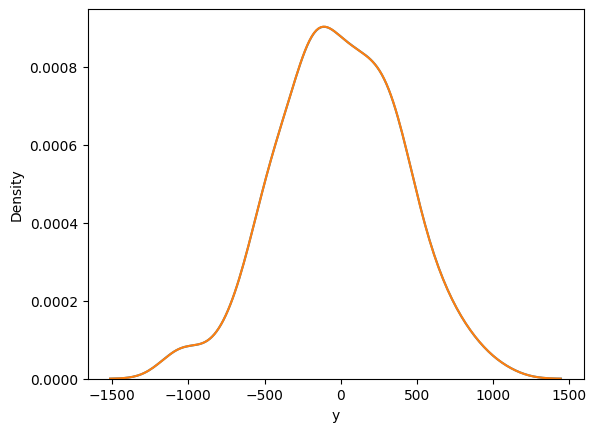

In [18]:
sns.kdeplot(valid['y'])
sns.kdeplot(rr.predict(valid[['x1', 'x2', 'x3']]))